<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/6Sates_Mobility_ClusterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=2519797c81af88d8375a5493ee06ec485a7bdbb30f042912a08cefd2d7efe13b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
import pandas as pd
import wget 
from PIL import Image

from tqdm import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
from pandas import Series, datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier
from sklearn.mixture import GaussianMixture

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Cluster Result Analysis

In [19]:
maryland_sd_inertia_6states_filtered = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/Maryland_Inertia_Data/Maryland_inertia_MobilityCluster_Oct24.csv',low_memory=False)
maryland_sd_inertia_6states_filtered.head(2)

,State,Postal Code,STFIPS,CTFIPS,CTNAME,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,cluster,cluster_label
0,Iowa,IA,19,19001,Adair County,54,31,2.46,59.1,16.7,36.9,0.16,2.30,0,7063,-22.9,2020-03-15,0.34,31,51859,0.4,1.9,49.35,12,5,169,3.69,0.26,0.011,0.0000,0.01,51,30.0,17.8,0.03,0.0,0,0,0.05,35,13.3,5.3,20.3,0.5,0.0,2,cluster_0_0_2
1,Iowa,IA,19,19001,Adair County,35,22,2.81,61.1,18.9,42.5,0.35,2.46,1,7063,-17.5,2020-03-18,0.34,31,51859,0.4,1.9,49.35,12,5,169,3.69,0.26,0.011,0.0472,0.01,0,30.0,25.9,0.04,0.0,0,0,0.04,42,13.3,5.3,20.3,0.5,0.0,1,cluster_0_0_1


In [20]:
maryland_sd_inertia_6states_filtered.head(2)

,State,Postal Code,STFIPS,CTFIPS,CTNAME,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,cluster,cluster_label
0,Iowa,IA,19,19001,Adair County,54,31,2.46,59.1,16.7,36.9,0.16,2.30,0,7063,-22.9,2020-03-15,0.34,31,51859,0.4,1.9,49.35,12,5,169,3.69,0.26,0.011,0.0000,0.01,51,30.0,17.8,0.03,0.0,0,0,0.05,35,13.3,5.3,20.3,0.5,0.0,2,cluster_0_0_2
1,Iowa,IA,19,19001,Adair County,35,22,2.81,61.1,18.9,42.5,0.35,2.46,1,7063,-17.5,2020-03-18,0.34,31,51859,0.4,1.9,49.35,12,5,169,3.69,0.26,0.011,0.0472,0.01,0,30.0,25.9,0.04,0.0,0,0,0.04,42,13.3,5.3,20.3,0.5,0.0,1,cluster_0_0_1


## All Cluster Analysis

### Basic Stats

In [21]:
X1_cols = ['Social distancing index','New cases/1000 people']

X2_cols = ['% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','Transit mode share','% working from home','New cases/1000 people']

In [22]:
maryland_sd_inertia_6states_filtered['cluster_label'].nunique()

65

In [23]:
maryland_sd_inertia_6states_filtered['cluster_label'].unique()

array(['cluster_0_0_2', 'cluster_0_0_1', 'cluster_0_0_0', 'cluster_0_0_3',
       'cluster_0_1', 'cluster_0_2_2', 'cluster_0_2_0', 'cluster_0_2_3',
       'cluster_0_2_1', 'cluster_0_3_0_2', 'cluster_0_3_0_1',
       'cluster_0_3_0_0', 'cluster_0_3_1', 'cluster_1_0_0_0',
       'cluster_1_0_0_1_1', 'cluster_1_0_0_1_0', 'cluster_1_0_1_0',
       'cluster_1_0_1_2', 'cluster_1_0_1_1', 'cluster_1_1_0',
       'cluster_1_1_3', 'cluster_1_1_2', 'cluster_1_1_1', 'cluster_1_1_4',
       'cluster_1_2_0_0', 'cluster_1_2_0_1', 'cluster_1_2_1_1',
       'cluster_1_2_1_2', 'cluster_1_2_1_0', 'cluster_1_2_2_0',
       'cluster_1_2_2_1', 'cluster_1_2_3_0', 'cluster_1_2_3_1',
       'cluster_2_0_0_1', 'cluster_2_0_0_0', 'cluster_2_0_1_0',
       'cluster_2_0_1_1', 'cluster_2_0_1_2', 'cluster_2_0_2_0',
       'cluster_2_0_2_1', 'cluster_2_1_0', 'cluster_2_1_1',
       'cluster_2_1_2_0', 'cluster_2_1_2_1', 'cluster_2_1_2_2',
       'cluster_2_2_2', 'cluster_2_2_1', 'cluster_2_2_0', 'cluster_2_3_0',
    

### High cases

In [24]:
high_cases_df = maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['New cases/1000 people'] >= 3.0]

In [25]:
high_cases_df.State.unique()

array(['Texas', 'Iowa', 'New York'], dtype=object)

In [26]:
pd.set_option('display.max_rows', None)

In [27]:
maryland_sd_inertia_6states_filtered.groupby(['cluster_label']).size().reset_index(name='row_count').sort_values(by='row_count', ascending=False)

,cluster_label,row_count
64,cluster_3_3,17129
4,cluster_0_1,16185
63,cluster_3_2,8811
34,cluster_2_0_0_1,5906
38,cluster_2_0_2_0,5150
53,cluster_2_3_3,4422
6,cluster_0_2_1,4133
62,cluster_3_1_4,3710
22,cluster_1_1_3,3513
47,cluster_2_2_2,3396


### Min -Max Covid Case per Cluster

In [28]:
#min max of new cases by group

new_case1k_per_cluster = maryland_sd_inertia_6states_filtered.groupby(['cluster_label']).agg({'New cases/1000 people': ['mean', 'min', 'max','size']})

In [29]:
new_case1k_per_cluster.sort_values(by=[('New cases/1000 people', 'max')], ascending=False) #('New cases/1000 people', 'min'),

New cases/1000 people                    
                                   mean  min     max   size
cluster_label                                              
cluster_0_1                    0.085789  0.0  9.9146  16185
cluster_3_3                    0.121811  0.0  9.0602  17129
cluster_0_2_1                  0.108791  0.0  8.6673   4133
cluster_3_1_4                  0.122862  0.0  7.8662   3710
cluster_1_1_1                  0.128114  0.0  7.6985   2655
cluster_3_1_1                  0.148528  0.0  6.2065   1879
cluster_3_2                    0.135779  0.0  5.7054   8811
cluster_0_3_0_2                0.070104  0.0  5.2396   1002
cluster_3_1_2                  0.135138  0.0  5.1960   2954
cluster_1_1_3                  0.098704  0.0  4.9409   3513
cluster_0_3_0_1                0.065542  0.0  4.2761   1921
cluster_1_1_4                  0.178711  0.0  3.6116   1716
cluster_1_2_0_1                0.338517  0.0  3.4561    239
cluster_0_2_0                  0.101627  0.0  3.3745   1923
cluster_0_3_1                  0.087813  0.0  3.3682   3223
cluster_3_1_3                  0.127281  0.0  3.3000   1265
cluster_0_3_0_0                0.069670  0.0  3.1438   2278
cluster_1_0_0_0                0.062912  0.0  2.9683   3286
cluster_1_1_0                  0.104971  0.0  2.9493   2473
cluster_1_0_0_1_1              0.049004  0.0  2.9374   1487
cluster_1_2_0_0                0.362564  0.0  2.4314    159
cluster_0_2_2                  0.097936  0.0  2.4217   2279
cluster_0_2_3                  0.124383  0.0  2.3487   3231
cluster_3_0_1                  0.187221  0.0  2.3244    639
cluster_3_1_0                  0.138370  0.0  2.2531   2524
cluster_2_1_1                  0.038177  0.0  2.0518   1316
cluster_2_0_0_0                0.095551  0.0  1.9661    594
cluster_1_1_2                  0.111018  0.0  1.8345   1546
cluster_0_0_1                  0.111986  0.0  1.8149   1477
cluster_1_0_1_1                0.065080  0.0  1.7934   1246
cluster_1_0_1_0                0.102002  0.0  1.6119   1030
cluster_2_0_2_1                0.126362  0.0  1.5860    475
cluster_0_0_0                  0.106550  0.0  1.4769   1833
cluster_2_3_3                  0.006606  0.0  1.4537   4422
cluster_0_0_2                  0.093367  0.0  1.4108   1069
cluster_2_3_1                  0.007361  0.0  1.3910   2403
cluster_3_0_2                  0.140801  0.0  1.3886    758
cluster_1_2_3_0                0.338404  0.0  1.3032     76
cluster_1_0_0_1_0              0.065389  0.0  1.2321    533
cluster_3_0_3                  0.108266  0.0  1.1528    970
cluster_3_0_0                  0.109264  0.0  1.0882    820
cluster_2_1_0                  0.008450  0.0  1.0800    573
cluster_2_1_2_2                0.003029  0.0  0.9596    488
cluster_0_0_3                  0.048041  0.0  0.9257    650
cluster_1_2_3_1                0.128398  0.0  0.8626     56
cluster_2_2_2                  0.001336  0.0  0.8240   3396
cluster_2_3_2_2                0.001914  0.0  0.7988   2054
cluster_2_0_1_1                0.001031  0.0  0.7381   1311
cluster_2_0_1_0                0.004181  0.0  0.7127   1812
cluster_2_3_2_1                0.004265  0.0  0.6713    651
cluster_1_2_1_2                0.027540  0.0  0.5696    243
cluster_2_2_1                  0.000370  0.0  0.5394   1567
cluster_2_1_2_0                0.002635  0.0  0.5377    272
cluster_1_2_1_0                0.025228  0.0  0.2814    188
cluster_1_2_2_0                0.045321  0.0  0.2449    103
cluster_1_2_2_1                0.005867  0.0  0.0703     82
cluster_2_2_0                  0.000686  0.0  0.0438    390
cluster_2_3_2_0                0.000024  0.0  0.0087   1324
cluster_2_0_0_1                0.000003  0.0  0.0075   5906
cluster_2_0_2_0                0.000004  0.0  0.0075   5150
cluster_2_3_0                  0.000021  0.0  0.0061   1524
cluster_2_0_1_2                0.000000  0.0  0.0000    541
cluster_1_2_1_1                0.000000  0.0  0.0000     41
cluster_1_0_1_2                0.000000  0.0  0.0000     9

### Min -Max Covid Case per Cluster-State

In [30]:
maryland_sd_inertia_6states_filtered.groupby(['cluster_label','State']).agg({'New cases/1000 people': ['mean', 'min', 'max','size']})#.sort_values(by=[('New cases/1000 people', 'max')], ascending=False)

New cases/1000 people                       
                                             mean     min     max   size
cluster_label     State                                                 
cluster_0_0_0     Iowa               1.293547e-01  0.0000  1.4769    764
                  New York           1.194383e-01  0.0000  0.5189     47
                  Texas              8.453638e-02  0.0000  1.4705    426
                  Wisconsin          9.203440e-02  0.0000  1.1574    596
cluster_0_0_1     Iowa               1.339733e-01  0.0000  1.6369    656
                  New York           1.876000e-01  0.0549  0.2814      3
                  Texas              1.134342e-01  0.0000  1.8149    365
                  Wisconsin          7.847704e-02  0.0000  0.9257    453
cluster_0_0_2     Iowa               9.098090e-02  0.0000  1.4108    356
                  New York           1.339000e-01  0.0029  0.2272      5
                  Texas              1.339356e-01  0.0000  1.2500    388
                  Wisconsin          4.619844e-02  0.0000  0.6842    320
cluster_0_0_3     Iowa               1.191322e-01  0.0000  0.6673    115
                  Texas              3.109836e-02  0.0000  0.9074    426
                  Wisconsin          3.925321e-02  0.0000  0.9257    109
cluster_0_1       Iowa               7.597943e-02  0.0000  2.6860   2300
                  New York           2.941385e-02  0.0000  0.4173   1480
                  Texas              1.013221e-01  0.0000  9.9146  10793
                  Wisconsin          4.753902e-02  0.0000  1.2976   1612
cluster_0_2_0     Iowa               1.677971e-01  0.0000  0.9842    174
                  New York           1.652500e-02  0.0000  0.0752     44
                  Texas              8.291927e-02  0.0000  3.3745   1505
                  Wisconsin          2.035605e-01  0.0000  1.5028    200
cluster_0_2_1     Iowa               1.080181e-01  0.0000  2.5965    753
                  New York           1.591982e-02  0.0000  0.2255    111
                  Texas              1.237901e-01  0.0000  8.6673   2612
                  Wisconsin          6.573760e-02  0.0000  1.7890    657
cluster_0_2_2     Iowa               1.202772e-01  0.0000  2.4217    895
                  New York           3.426387e-02  0.0000  0.2883    191
                  Texas              7.312968e-02  0.0000  0.8898    566
                  Wisconsin          1.078356e-01  0.0000  1.2234    627
cluster_0_2_3     Iowa               1.539774e-01  0.0000  1.8505   1212
                  New York           2.089096e-02  0.0000  0.1364    188
                  Texas              7.013206e-02  0.0000  2.3487   1304
                  Wisconsin          2.274761e-01  0.0000  1.6389    527
cluster_0_3_0_0   Iowa               6.774755e-02  0.0000  1.1869    143
                  New York           3.613592e-02  0.0000  0.4719    142
                  Texas              7.549372e-02  0.0000  3.1438   1814
                  Wisconsin          3.879497e-02  0.0000  0.7872    179
cluster_0_3_0_1   Iowa               6.179887e-02  0.0000  1.1202    617
                  New York           2.650000e-02  0.0000  0.1141    109
                  Texas              8.546805e-02  0.0000  4.2761    867
                  Wisconsin          3.288994e-02  0.0000  0.9208    328
cluster_0_3_0_2   Iowa               7.189146e-02  0.0000  1.3728    164
                  New York           1.650757e-01  0.0000  1.0314     37
                  Texas              7.522909e-02  0.0000  5.2396    660
                  Wisconsin          1.911348e-02  0.0000  0.4274    141
cluster_0_3_1     Iowa               1.067621e-01  0.0000  0.7762    140
                  New York           1.569508e-02  0.0000  0.0752     61
                  Texas              8.740324e-02  0.0000  3.3682   2716
                  Wisconsin          9.715196e-02  0.0000  2.0037    306
cluster_1_0_0_0   Iowa               8.868943e-02  0.0000  0.8261    123
             

In [32]:
maryland_sd_inertia_6states_filtered.State.unique()

array(['Iowa', 'New York', 'Texas', 'Wisconsin'], dtype=object)

In [ ]:
pos_cor_columns = ['CTNAME','Social distancing index','% change in consumption',
                   '% staying home','Trips/person','% out-of-state trips','Miles/person',
                   'Work trips/person','Non-work trips/person','% working from home',
                   '% people older than 60','Median income','% African Americans', '% Hispanic Americans','% Male','Population density',
                   'Employment density','Hospital beds/1000 people','Testing capacity','Tests done/1000 people',
                   '% ICU utilization','COVID exposure/1000 people',
                    'New cases/1000 people']

## 1.cluster_4_0_0



### Different Analysis

In [ ]:
maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_4_0_0']['New cases/1000 people'].shape

(2691,)

In [ ]:
cluster_4_0_0= maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 'cluster_4_0_0']
cluster_4_0_0.reset_index(drop=True)

,State,Postal Code,STFIPS,CTFIPS,CTNAME,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,cluster,cluster_label
0,New York,NY,36,36003,Allegany County,36,23,3.80,27.0,4.6,41.2,0.70,3.10,0,46430,-15.3,2020-03-27,0.50,25,47033,1.4,1.6,50.52,45,16,97,2.74,0.22,0.029,0.0000,2.27,5,77.443678,30.6,7.46,36.81,2074,53,1.38,7,18.7,8.4,38.0,0.80,1.96,0,cluster_4_0_0
1,New York,NY,36,36003,Allegany County,36,24,3.85,27.7,3.8,42.0,0.62,3.23,0,46430,-11.7,2020-05-04,0.50,25,47033,1.4,1.6,50.52,45,16,97,2.74,0.22,0.029,0.0000,9.48,3,78.082265,31.7,51.55,51.23,1979,244,8.18,42,10.3,14.5,39.4,0.50,15.63,0,cluster_4_0_0
2,New York,NY,36,36003,Allegany County,22,19,4.48,27.7,4.7,42.0,0.77,3.71,0,46430,1.4,2020-05-05,0.50,25,47033,1.4,1.6,50.52,45,16,97,2.74,0.22,0.029,0.0000,9.13,4,77.277709,31.2,52.65,47.71,1837,269,8.37,49,10.3,14.5,39.4,0.50,15.37,0,cluster_4_0_0
3,New York,NY,36,36007,Broome County,44,30,3.65,17.9,4.9,27.3,0.75,2.90,2,191659,-11.5,2020-03-27,3.29,25,50859,5.2,4.1,49.18,272,136,116,2.74,0.22,0.029,0.0157,2.27,0,77.443678,30.6,7.46,36.81,2074,117,1.38,7,18.7,8.4,38.0,0.80,1.96,0,cluster_4_0_0
4,New York,NY,36,36009,Cattaraugus County,31,24,4.27,31.3,5.5,39.2,0.73,3.54,0,76840,-8.2,2020-03-27,0.33,25,47240,1.6,2.1,49.55,59,25,115,2.74,0.22,0.029,0.0000,2.27,63,77.443678,30.6,7.46,36.81,2074,118,1.38,7,18.7,8.4,38.0,0.80,1.96,0,cluster_4_0_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,Texas,TX,48,48505,Zapata County,58,33,2.36,23.5,0.0,29.2,0.43,1.93,1,14190,-37.2,2020-07-18,0.00,18,31113,0.0,94.2,49.95,14,3,73,2.82,0.30,0.040,0.2349,7.87,0,56.560654,11.2,99.04,18.39,1430,49,9.57,119,3.0,7.9,38.2,0.19,1.43,0,cluster_4_0_0
2687,Texas,TX,48,48507,Zavala County,30,26,3.55,29.7,0.1,41.0,0.63,2.92,10,11983,-1.1,2020-07-15,0.35,18,30988,0.5,93.7,51.17,9,2,62,2.82,0.30,0.040,0.2782,7.01,0,55.277803,10.7,92.06,15.81,1234,71,8.62,119,3.0,7.9,38.2,0.19,1.41,0,cluster_4_0_0
2688,Texas,TX,48,48507,Zavala County,36,26,3.64,28.5,0.0,26.9,0.51,3.14,9,11983,6.3,2020-07-16,0.35,18,30988,0.5,93.7,51.17,9,2,62,2.82,0.30,0.040,0.5285,7.41,0,55.705075,10.8,94.07,16.67,1300,73,9.01,119,3.0,7.9,38.2,0.19,1.41,0,cluster_4_0_0
2689,Texas,TX,48,48507,Zavala County,31,22,3.01,35.7,0.0,33.7,0.66,2.36,6,11983,-20.1,2020-07-17,0.35,18,30988,0.5,93.7,51.17,9,2,62,2.82,0.30,0.040,0.6954,7.67,0,56.133749,11.1,96.42,17.53,1365,78,9.32,119,3.0,7.9,38.2,0.19,1.43,0,cluster_4_0_0


### States

In [ ]:
#states of cluster one

cluster_4_0_0.State.unique()


array(['New York', 'Texas'], dtype=object)

In [ ]:
cluster_4_0_0.CTNAME.nunique()

198

In [ ]:
#states of cluster one

cluster_4_0_0.CTNAME.unique()

array(['Allegany County', 'Broome County', 'Cattaraugus County',
       'Cayuga County', 'Chautauqua County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County',
       'Delaware County', 'Essex County', 'Franklin County',
       'Fulton County', 'Genesee County', 'Hamilton County',
       'Herkimer County', 'Jefferson County', 'Lewis County',
       'Livingston County', 'Madison County', 'Montgomery County',
       'Niagara County', 'Oneida County', 'Ontario County',
       'Orleans County', 'Otsego County', 'Putnam County',
       'Rensselaer County', 'St. Lawrence County', 'Schenectady County',
       'Schoharie County', 'Schuyler County', 'Seneca County',
       'Steuben County', 'Sullivan County', 'Tioga County',
       'Tompkins County', 'Ulster County', 'Warren County',
       'Washington County', 'Wayne County', 'Wyoming County',
       'Yates County', 'Aransas County', 'Atascosa County',
       'Bailey County', 'Bandera County', 'Baylor County', '

In [ ]:
#min max of new cases by each county of cluster

cluster_4_0_0.groupby(['CTNAME']).agg({'New cases/1000 people': ['mean', 'min', 'max']})

New cases/1000 people                
                                 mean     min     max
CTNAME                                               
Allegany County              0.000000  0.0000  0.0000
Aransas County               0.165783  0.1401  0.2102
Atascosa County              0.082850  0.0464  0.1193
Bailey County                0.392427  0.0474  0.9013
Bandera County               0.039269  0.0000  0.1022
...                               ...     ...     ...
Wyoming County               0.024900  0.0249  0.0249
Yates County                 0.021460  0.0000  0.0805
Young County                 0.263225  0.1108  0.4618
Zapata County                0.552025  0.2349  0.7282
Zavala County                0.514600  0.2782  0.6954

[198 rows x 3 columns]

In [ ]:
cluster_4_0_0.describe().T

,count,mean,std,min,25%,50%,75%,max
STFIPS,2691.0,47.571906,2.226140,36.000000,48.00000,48.000000,48.000000,48.000000
CTFIPS,2691.0,47826.336306,2266.783983,36003.000000,48131.00000,48255.000000,48371.000000,48507.000000
Social distancing index,2691.0,26.145671,10.235351,7.000000,19.00000,24.000000,32.000000,86.000000
% staying home,2691.0,22.607581,6.180182,0.000000,18.00000,22.000000,26.000000,57.000000
Trips/person,2691.0,3.420706,0.527279,0.770000,3.09000,3.410000,3.745000,9.080000
% out-of-county trips,2691.0,38.577741,12.844158,3.400000,30.70000,37.900000,46.100000,100.000000
% out-of-state trips,2691.0,2.923226,5.910953,0.000000,0.20000,0.600000,2.900000,41.100000
Miles/person,2691.0,50.978967,16.371014,15.900000,40.90000,48.300000,57.550000,285.900000
Work trips/person,2691.0,0.469402,0.220346,0.010000,0.33000,0.440000,0.570000,1.910000
Non-work trips/person,2691.0,2.951624,0.549812,0.760000,2.63000,2.950000,3.280000,9.070000


In [ ]:
## Min value of all column

cluster_4_0_0.min(axis=0) # will return min value of each column

State                                           New York
Postal Code                                           NY
STFIPS                                                36
CTFIPS                                             36003
CTNAME                                   Allegany County
Social distancing index                                7
% staying home                                         0
Trips/person                                        0.77
% out-of-county trips                                3.4
% out-of-state trips                                   0
Miles/person                                        15.9
Work trips/person                                   0.01
Non-work trips/person                               0.76
New COVID cases                                        0
Population                                           442
% change in consumption                            -78.6
date                                          2020-03-27
Transit mode share             

In [ ]:
## Max value of all column

cluster_4_0_0.max(axis=0) # will return max value of each column

State                                            Texas
Postal Code                                         TX
STFIPS                                              48
CTFIPS                                           48507
CTNAME                                   Zavala County
Social distancing index                             86
% staying home                                      57
Trips/person                                      9.08
% out-of-county trips                              100
% out-of-state trips                              41.1
Miles/person                                     285.9
Work trips/person                                 1.91
Non-work trips/person                             9.07
New COVID cases                                    227
Population                                      275910
% change in consumption                          229.5
date                                        2020-09-29
Transit mode share                                8.16
% people o

### Group Columns

In [ ]:
cluster_4_0_0.columns

Index(['State', 'Postal Code', 'STFIPS', 'CTFIPS', 'CTNAME',
       'Social distancing index', '% staying home', 'Trips/person',
       '% out-of-county trips', '% out-of-state trips', 'Miles/person',
       'Work trips/person', 'Non-work trips/person', 'New COVID cases',
       'Population', '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people', 'New cases/1000 people',
       'Active cases/1000 people', '#days: decreasing COVID cases',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 p

In [ ]:
filter_col= ['Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','% change in consumption','Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

social_dist= ['CTNAME','Social distancing index','% change in consumption', 'New cases/1000 people']

mobility = ['CTNAME','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','Transit mode share',
       '% working from home', 'New cases/1000 people']

demographic = ['CTNAME','% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density','# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people','New cases/1000 people']

employment = ['CTNAME','Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

### Correlation Plot

#### 1.social_dist

In [ ]:
social_dist

['CTNAME',
 'Social distancing index',
 '% change in consumption',
 'New cases/1000 people']

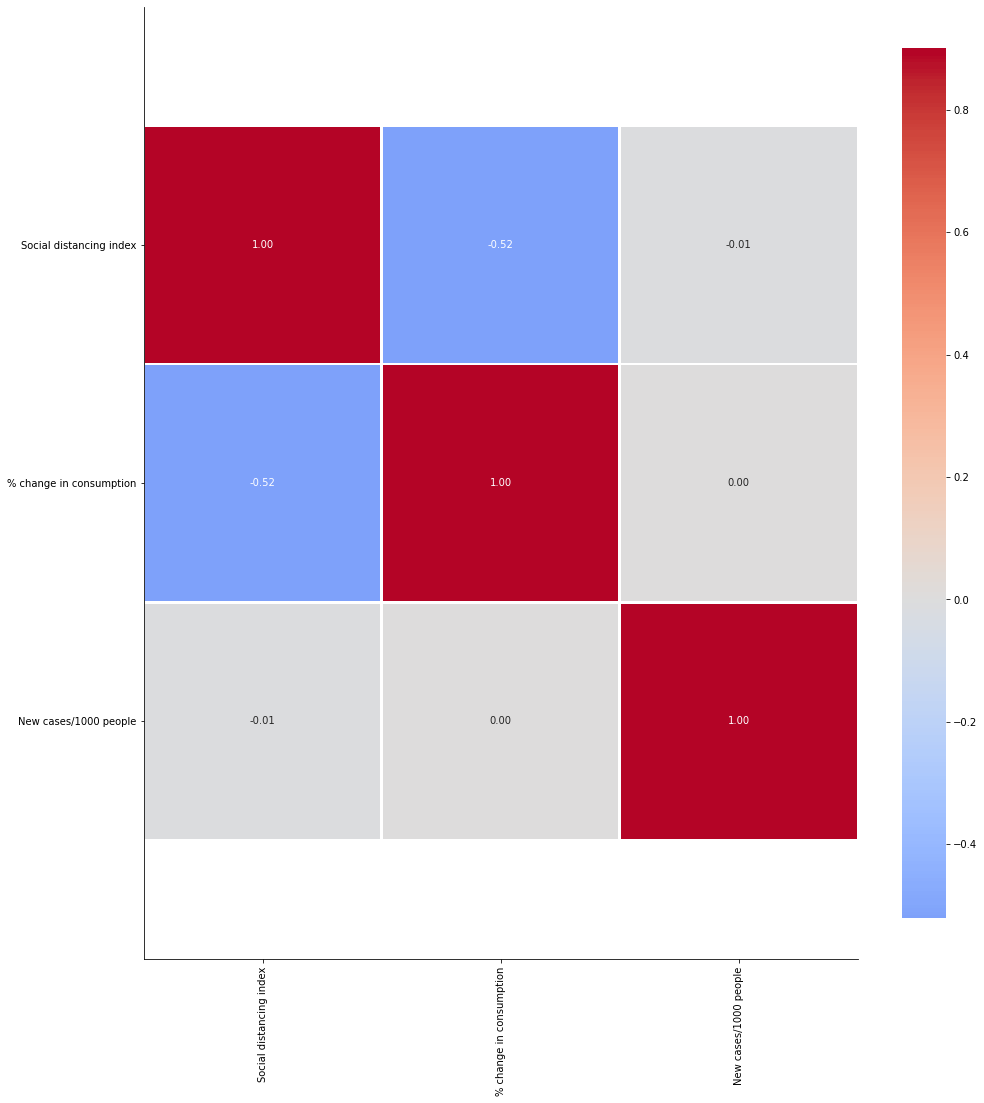

In [ ]:
corr = cluster_4_0_0[social_dist].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 2.mobility

In [ ]:
mobility


['CTNAME',
 '% staying home',
 'Trips/person',
 '% out-of-county trips',
 '% out-of-state trips',
 'Miles/person',
 'Work trips/person',
 'Non-work trips/person',
 'Transit mode share',
 '% working from home',
 'New cases/1000 people']

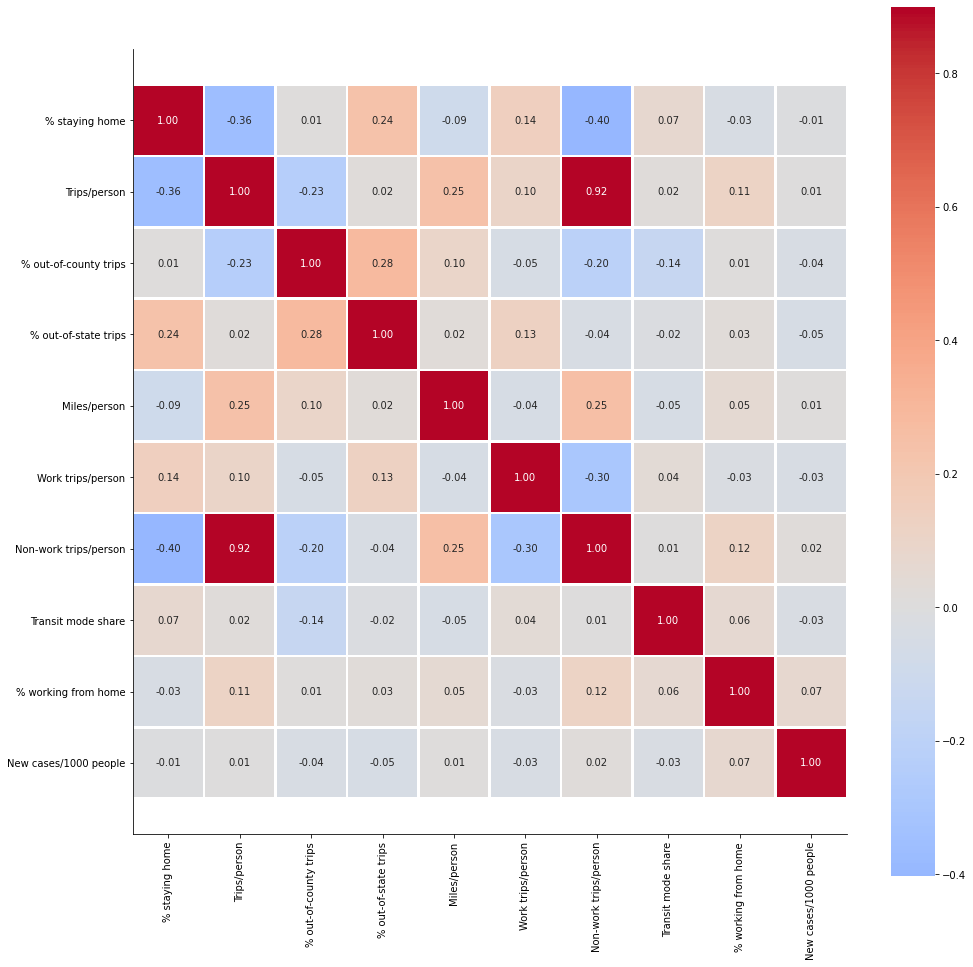

In [ ]:
corr = cluster_4_0_0[mobility].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 3.demographic

In [ ]:
demographic

['CTNAME',
 '% people older than 60',
 'Median income',
 '% African Americans',
 '% Hispanic Americans',
 '% Male',
 'Population density',
 'Employment density',
 '# hot spots/1000 people',
 'Hospital beds/1000 people',
 'ICUs/1000 people',
 '# contact tracing workers/1000 people',
 '% hospital bed utilization',
 'Testing capacity',
 'Tests done/1000 people',
 '% ICU utilization',
 'Ventilator shortage',
 'Imported COVID cases',
 'COVID exposure/1000 people',
 'New cases/1000 people']

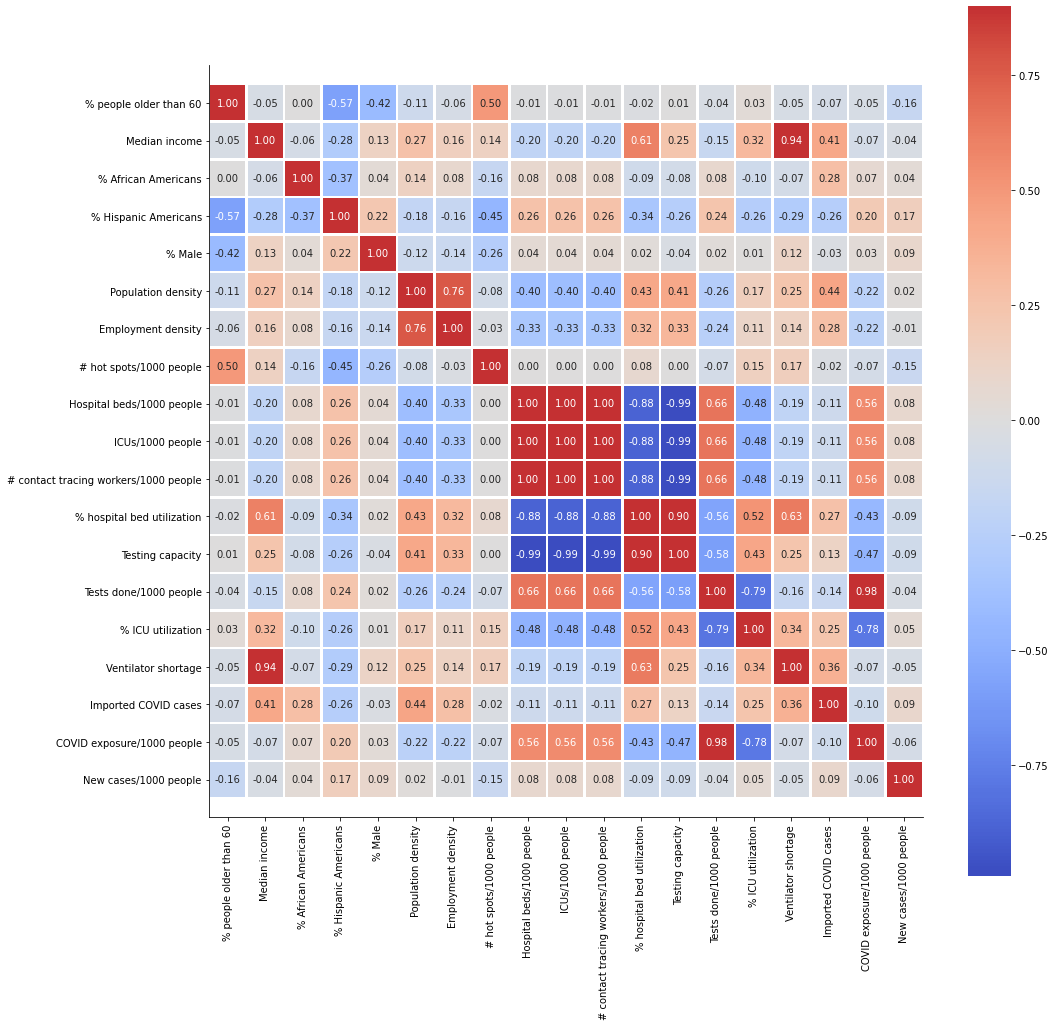

In [ ]:
corr = cluster_4_0_0[demographic].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 4.employment

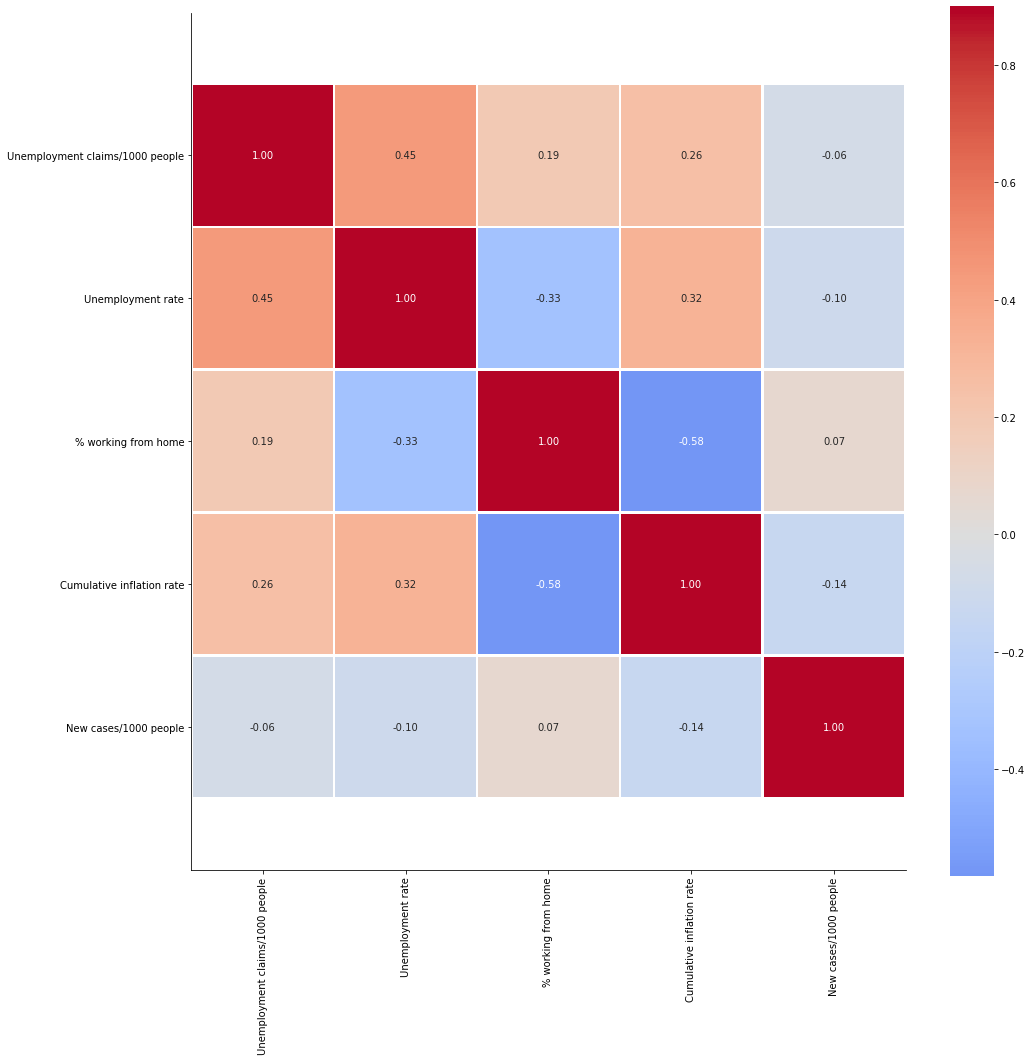

In [ ]:
corr = cluster_4_0_0[employment].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

#### 5.Pos_columns

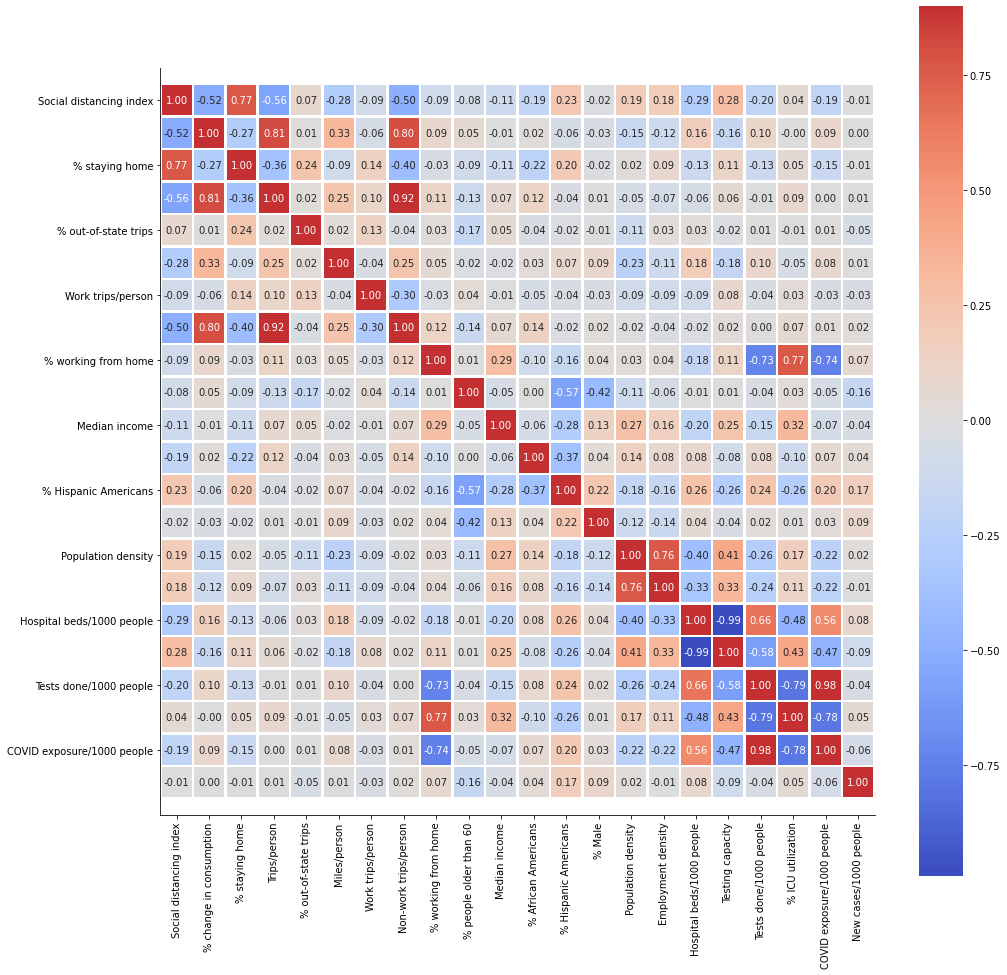

In [ ]:
pos_cor_columns = ['CTNAME','Social distancing index','% change in consumption',
                   '% staying home','Trips/person','% out-of-state trips','Miles/person',
                   'Work trips/person','Non-work trips/person','% working from home',
                   '% people older than 60','Median income','% African Americans', '% Hispanic Americans','% Male','Population density',
                   'Employment density','Hospital beds/1000 people','Testing capacity','Tests done/1000 people',
                   '% ICU utilization','COVID exposure/1000 people',
                    'New cases/1000 people']
corr = cluster_4_0_0[pos_cor_columns].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)